<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.텐서플로우 버전 선택코드 (V_1.15.2, V_2.2.0)
버전 1과 2를 선택하여 불러와 줄 수 있습니다. 
(단, 버전 수정은 런타임 초기화 작업 필요)

In [ ]:
try:
  #%tensorflow_version 1.x
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

단순히 tensorflow를 불러오게 되면 가장 최신버전을 불러와 주게 됩니다.


In [ ]:
#버전 확인
print(tf.__version__) 

2.4.0


# 1.텐서플로 기초


## 1.1 난수 생성
- random.uniform


In [ ]:
rand = tf.random.uniform([1],0,1)
print(rand)

In [ ]:
rand = tf.random.uniform([4],0,1)
print(rand)

In [ ]:
rand = tf.random.uniform([4,2],0,1)
print(rand)

In [ ]:
rand = tf.random.uniform([6,8],0,1)
print(rand)

In [ ]:
rand = tf.random.uniform([6,2,3],0,1)
print(rand)

- random.normal (정규분포)

In [ ]:
tf.random.normal([4],0,1)

In [ ]:
tf.random.normal([3,2],0,1)

## 1.2 뉴런 만들기

#### 활성화 함수 : 시그모이드(sigmoid  함수)

In [ ]:
# 시그모이드 함수 정의

import math
def sigmoid(x) :
  return 1/ (1 + math.exp(-x))

ex) 입력값이 1일 때 기대출력이 0이 되는 뉴런

In [ ]:
x = 1
y = 0
w = tf.random.normal([1], 0, 1)   # w : 가중치
output = sigmoid(x * w)

- 위에서 나온 실제출력(output)을 0에서 뺀 값
0 - output값 = -output값 을 에러(error)라고 한다. 

- 뉴런의 학습은 이 에러가 0 에 가까워지게 해서 출력으로 기댓값에 가까운 값을 얻는 것

- 뉴런 (w) 학습 알고리즘 : 경사하강법


#### **경사하강법(Gradient Descent)**
(경사 : 손실 곡선의 기울기)

식 :  *w = w + x * a * error*

*a는 w 를 업데이트하는 정도(**학습률**)*

큰 값으로 설정하면 학습이 더 빨리 되지만 과도한 학습으로 적정한 수치를 벗어날 우려가 있고 , 너무 작은 값으로 설정하면 학습 속도가 너무 느려질 수 있음.

In [ ]:
# a(학습률) = 0.1 로 했을 때

for i in range(1000) :
  output = sigmoid(x*w)
  error = y - output
  w = w + x*0.1*error

  if i % 100 == 99 :
    print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i, error, output))

반복 횟수 99 : , 에러값 : -0.10909537057281046, 결과값 : 0.10909537057281046
반복 횟수 199 : , 에러값 : -0.05422273811384234, 결과값 : 0.05422273811384234
반복 횟수 299 : , 에러값 : -0.035681774770393394, 결과값 : 0.035681774770393394
반복 횟수 399 : , 에러값 : -0.026501666930054058, 결과값 : 0.026501666930054058
반복 횟수 499 : , 에러값 : -0.021048633170569327, 결과값 : 0.021048633170569327
반복 횟수 599 : , 에러값 : -0.017443816846908634, 결과값 : 0.017443816846908634
반복 횟수 699 : , 에러값 : -0.014886763879022246, 결과값 : 0.014886763879022246
반복 횟수 799 : , 에러값 : -0.012980004610878573, 결과값 : 0.012980004610878573
반복 횟수 899 : , 에러값 : -0.01150409234839889, 결과값 : 0.01150409234839889
반복 횟수 999 : , 에러값 : -0.010328220755280825, 결과값 : 0.010328220755280825


가중치, 반복횟수, 학습률 조절해보기


In [ ]:
x = 1
y = 0
w = tf.random.normal([1], 0, 0.02)   # w : 가중치
output = sigmoid(x * w)
print(output)

for i in range(5000) :
  output = sigmoid(x*w)
  error = y - output
  w = w + x*0.15*error

  if i % 1000 == 999 :
    print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i, error, output))

0.5021210544169781
반복 횟수 999 : , 에러값 : -0.006794744219287976, 결과값 : 0.006794744219287976
반복 횟수 1999 : , 에러값 : -0.0033724268129494677, 결과값 : 0.0033724268129494677
반복 횟수 2999 : , 에러값 : -0.0022414364503833377, 결과값 : 0.0022414364503833377
반복 횟수 3999 : , 에러값 : -0.0016782040851658557, 결과값 : 0.0016782040851658557
반복 횟수 4999 : , 에러값 : -0.0013410814274943713, 결과값 : 0.0013410814274943713


####편향 : 입력을 0 으로 넣었을 때 출력으로 1 을 얻는 뉴런은 어떻게 만들까
- 편향(bias) 을 넣어줘야 한다.
(늘 한쪽으로 치우친 고정된 값 (ex:1)을 받아서 입력으로 0 을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지합니다)

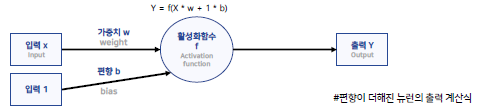


In [ ]:
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000) :
  output = sigmoid(x * w +  1 * b)
  error = y- output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error
  
  if i % 100 == 99 :
    print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i, error, output))

반복 횟수 99 : , 에러값 : 0.11678798918091904, 결과값 : 0.883212010819081
반복 횟수 199 : , 에러값 : 0.056176687582400464, 결과값 : 0.9438233124175995
반복 횟수 299 : , 에러값 : 0.03653414475390393, 결과값 : 0.9634658552460961
반복 횟수 399 : , 에러값 : 0.02697341622477234, 결과값 : 0.9730265837752277
반복 횟수 499 : , 에러값 : 0.021346766681704987, 결과값 : 0.978653233318295
반복 횟수 599 : , 에러값 : 0.017648819637558155, 결과값 : 0.9823511803624418
반복 횟수 699 : , 에러값 : 0.015036173191003255, 결과값 : 0.9849638268089967
반복 횟수 799 : , 에러값 : 0.013093612962001622, 결과값 : 0.9869063870379984
반복 횟수 899 : , 에러값 : 0.011593394237285781, 결과값 : 0.9884066057627142
반복 횟수 999 : , 에러값 : 0.010400247742740731, 결과값 : 0.9895997522572593


## 1.3.1 첫 번째 신경망 네트워크 : AND

AND 연산 진리표                                                                           
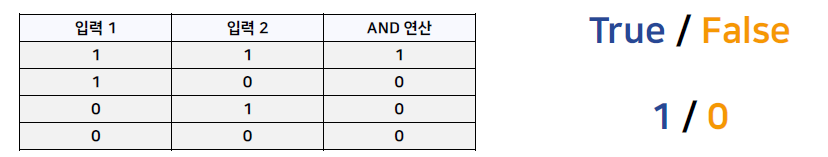


위 4개의 AND연산 쌍을 신경망에 넣어 학습시키면
AND 연산을 할 수 있는 신경망 네트워크를 만들 수 있다.

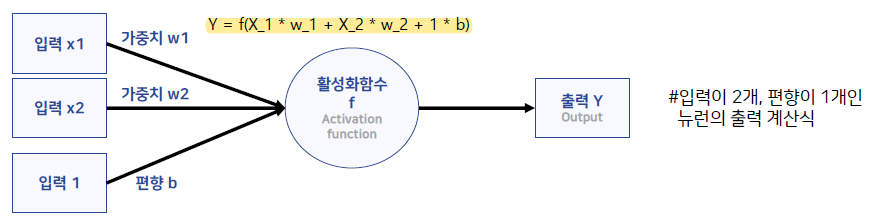


In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])   # AND 연산의 입력값
y = np.array([[1],[0],[0],[0]])   # AND 연산의 출력값
w = tf.random.normal([2], 0, 1)   #가중치가 두개
b = tf.random.normal([1], 0, 1)
b_x = 1 # 편향

for i in range(2000) :
  error_sum = 0
  for j in range(4) :
    # 활성화 함수 : Y = f(X_1 * w_1 + X_2 * w_2 + 1 * b)
    output = sigmoid(np.sum(x[j]*w) + b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

    if i % 1000 == 999 :
      print(i, error_sum)

999 0.06844075289922436
999 0.01968495946630245
999 -0.02912500018635681
999 -0.029313348137605177
1999 0.035189371739625885
1999 0.010081638595215166
1999 -0.015041447409607514
1999 -0.015065339660548181


결과값이 기대출력에 가까운지 확인


In [ ]:
for i in range(4) :
  print('X: ', x[i], 'Y:', y[i], 'Output :' , sigmoid(np.sum(x[i]*w) + b))

X:  [1 1] Y: [1] Output : 0.9648279141659607
X:  [1 0] Y: [0] Output : 0.02492392061358937
X:  [0 1] Y: [0] Output : 0.02500025144308602
X:  [0 0] Y: [0] Output : 2.3892182586120323e-05


In [ ]:
print('w :', w)
print('b :', b)

w : tf.Tensor([6.975248 6.978384], shape=(2,), dtype=float32)
b : tf.Tensor([-10.641935], shape=(1,), dtype=float32)


## 1.3.2 두 번째 신경망 네트워크 : OR


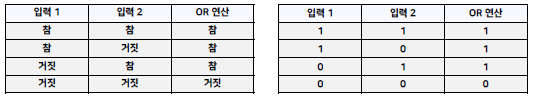

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])   # OR 연산의 입력값 (AND와 같음)
y = np.array([[1],[1],[1],[0]])   # OR 연산의 출력값
w = tf.random.normal([2], 0, 1)   #가중치가 두개
b = tf.random.normal([1], 0, 1)
b_x = 1 # 편향

for i in range(2000) :
  error_sum = 0
  for j in range(4) :
    # 활성화 함수 : Y = f(X_1 * w_1 + X_2 * w_2 + 1 * b)
    output = sigmoid(np.sum(x[j]*w) + b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

    if i % 1000 == 999 :
      print(i, error_sum)

999 2.1174949715430103e-05
999 0.019931828996454293
999 0.039551480772984426
999 -0.010047330254017751
1999 2.667266880695962e-06
1999 0.01008092999366883
1999 0.020125988994385113
1999 -0.005068183514609519


결과값이 기대출력에 가까운지 확인

In [ ]:
for i in range(4) :
  print('X: ', x[i], 'Y:', y[i], 'Output :' , sigmoid(np.sum(x[i]*w) + b))

X:  [1 1] Y: [1] Output : 0.9999973367415149
X:  [1 0] Y: [1] Output : 0.9899267311681452
X:  [0 1] Y: [1] Output : 0.9899498613216355
X:  [0 0] Y: [0] Output : 0.025132372207835752


In [ ]:
print('w :', w)
print('b :', b)

w : tf.Tensor([8.245891 8.248213], shape=(2,), dtype=float32)
b : tf.Tensor([-3.658145], shape=(1,), dtype=float32)


## 1.3.3 세 번째 신경망 네트워크 : XOR

홀수 개의 입력이 참일 때만 결괏값이 참이 된다

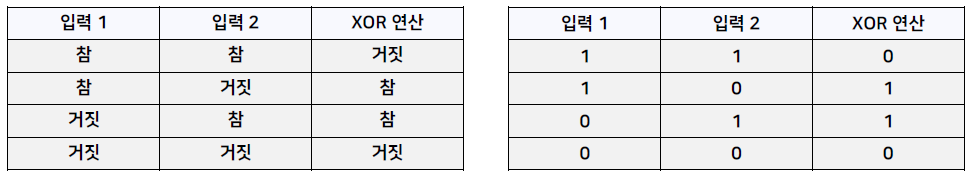

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])   # XOR 연산의 입력값
y = np.array([[0],[1],[1],[0]])   # XOR 연산의 출력값
w = tf.random.normal([2], 0, 1)   #가중치가 두개
b = tf.random.normal([1], 0, 1)
b_x = 1 # 편향


In [ ]:
for i in range(2000) :
  error_sum = 0
  for j in range(4) :
    # 활성화 함수 : Y = f(X_1 * w_1 + X_2 * w_2 + 1 * b)
    output = sigmoid(np.sum(x[j]*w) + b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

    if i % 500 == 499 :
      print(i, error_sum)

499 -0.5129462845907482
499 -9.778429983919867e-05
499 0.5127509486679643
499 0.0001135221069662462
999 -0.512817690098105
999 -5.5842632296077e-08
999 0.5128175784128404
999 4.653552987399223e-09
1499 -0.5128176323940516
1499 -9.307106196843051e-10
1499 0.512817631463341
1499 1.8614210173240053e-09
1999 -0.5128176323940516
1999 -9.307106196843051e-10
1999 0.512817631463341
1999 1.8614210173240053e-09


결과값이 기대출력에 가까운지 확인

In [ ]:
for i in range(4) :
  print('X: ', x[i], 'Y:', y[i], 'Output :' , sigmoid(np.sum(x[i]*w) + b))

X:  [1 1] Y: [0] Output : 0.5128176323940516
X:  [1 0] Y: [1] Output : 0.5128176314633411
X:  [0 1] Y: [1] Output : 0.4999999990686774
X:  [0 0] Y: [0] Output : 0.49999999813735485


In [ ]:
print('w :', w)
print('b :', b)

w : tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b : tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


=> 결과값이 기대출력과 달리 0.5에 가깝다

=> ***XOR Problem***
- 해결책 : 다층 퍼셉트론

## 1.4 다층 퍼셉트론

tf.keras 이용하여 세개의 퍼셉트론과 뉴런 사용 신경망 구축

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0], [0,1], [0,0]])
y = np.array([[0],[1],[1],[0]])


# 시퀀셜 모델 사용 (레이어를 일직선으로 배치)
## 완전 연결계층(Dense) 사용
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),  # 첫번째 레이어 정의,  차원은 첫번째 레이어 정의할때만
     tf.keras.layers.Dense(units=1, activation='sigmoid') ])                  # 두번째 레이어 정의



model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1), loss = 'mse') 
# 최적화 함수 : SGD ((률적 경사하강법)
# 손실 줄이는 법 : MSE (평균 제곱 오차)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Total params : 9 인 것을 보아 편향이 포함되어 있다는 것을 알수 있다 

=> 위의 식을 그림으로 표현하면



> 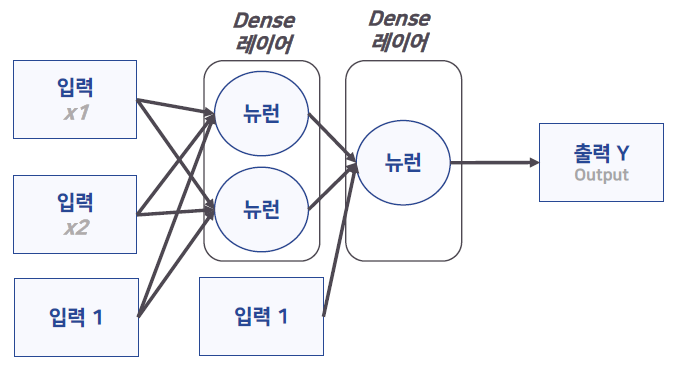

네트워크 학습시키고 평가해보기

In [ ]:
history = model.fit(x, y, epochs= 2000,batch_size=1) 
# epochs : 훈련데이터를 반복학습 시키는 횟수
# batch_sixe : 한번에 학습시키는 데이터의 수 

In [ ]:
model.predict(x)

# 첫번째와 네번째는 0에 가깝고 두번째,세번째는 1에 가까우므로 잘 계산하고 있다. 

array([[0.31938624],
       [0.26654446],
       [0.39034098],
       [0.33210093]], dtype=float32)